In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 미션 1

In [3]:
# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False

In [4]:
# 고객 만족 데이터 생성 (1~10점 척도)
np.random.seed(42)

# 평균이 7.5, 표준편차가 1.5인 정규분포에서 1000개의 샘플을 생성
satisfaction_scores = np.random.normal(7.5, 1.5, 1000)
satisfaction_scores = np.clip(satisfaction_scores, 1, 10)  # 1~10점 범위로 제한

# 데이터프레임 생성
# 1부터 1000까지의 숫자를 각 고객 고유 ID로 할당
customer_data = pd.DataFrame({
    'customer_id': range(1,1001),
    'satisfaction_score': satisfaction_scores
})
print("🛍️ 온라인 쇼핑몰 고객 만족도 데이터")
print(customer_data.head())

🛍️ 온라인 쇼핑몰 고객 만족도 데이터
   customer_id  satisfaction_score
0            1            8.245071
1            2            7.292604
2            3            8.471533
3            4            9.784545
4            5            7.148770


In [5]:
print('mean:',customer_data['satisfaction_score'].mean())
print('median:',customer_data['satisfaction_score'].median())
print('mode:',customer_data['satisfaction_score'].mode())
print('var:',customer_data['satisfaction_score'].var())
print('min:',customer_data['satisfaction_score'].min())
print('max:',customer_data['satisfaction_score'].max())
print('quantile 25:',customer_data['satisfaction_score'].quantile(0.25))
print('quantile 75:',customer_data['satisfaction_score'].quantile(0.75))
print('quantile 50:',customer_data['satisfaction_score'].quantile(0.5))

mean: 7.496515139219837
median: 7.537950918352332
mode: 0    10.0
Name: satisfaction_score, dtype: float64
var: 1.9567482923528627
min: 2.638098989896391
max: 10.0
quantile 25: 6.528614541806473
quantile 75: 8.471915813209396
quantile 50: 7.537950918352332


<Axes: xlabel='satisfaction_score', ylabel='Count'>

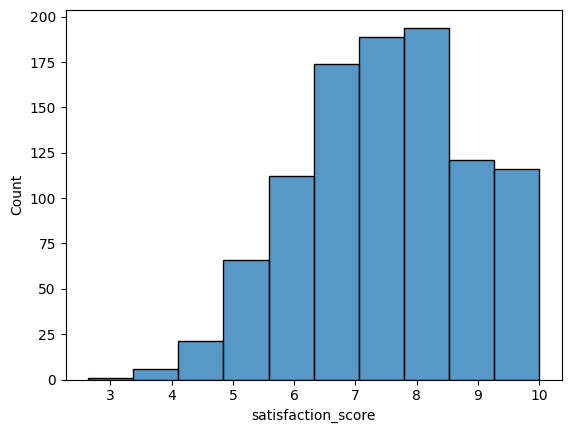

In [6]:
# bins: 상자를 몇 개로 나눌지
sns.histplot(customer_data['satisfaction_score'], bins=10)

# 미션 2

In [7]:
# 두 지역의 월급 데이터 생성
np.random.seed(123)

# A지역: 일반적인 분포
region_a_salary = np.random.normal(300, 50, 100)

# B지역: 소수의 고소득자가 있는 분포
# concatenate: 여러 개의 배열을 이어붙임.
region_b_normal = np.random.normal(280, 40, 95)
region_b_high = np.random.normal(1500, 200, 5)   # 소수 고소득자
region_b_salary = np.concatenate([region_b_normal, region_b_high])

salary_data = pd.DataFrame({
    'region': ['A']*100 + ['B']*100,
    'salary': np.concatenate([region_a_salary, region_b_salary])
})

print("💰 두 지역 월급 데이터")
print(salary_data.groupby('region')['salary'].describe())

💰 두 지역 월급 데이터
        count        mean         std         min         25%         50%  \
region                                                                      
A       100.0  301.355454   56.696217  160.070545  258.362729  297.336513   
B       100.0  333.545926  239.553122  177.717816  258.593342  285.284835   

               75%          max  
region                           
A       349.169418   419.618263  
B       305.918175  1477.829856  


In [8]:
sal_a = pd.Series(region_a_salary)
print('mean : ' , sal_a.mean())
print('median : ' , sal_a.median())

sal_b = pd.Series(region_b_salary)
print('mean : ' , sal_b.mean())
print('median : ' , sal_b.median())

mean :  301.355453674518
median :  297.3365134146072
mean :  333.545926008342
median :  285.2848349380927


<Axes: ylabel='Count'>

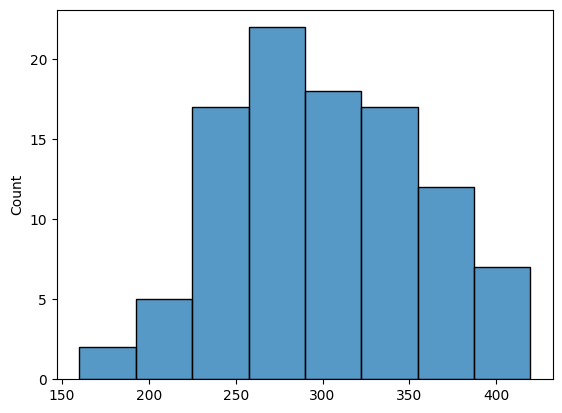

In [9]:
sns.histplot(sal_a)

<Axes: ylabel='Count'>

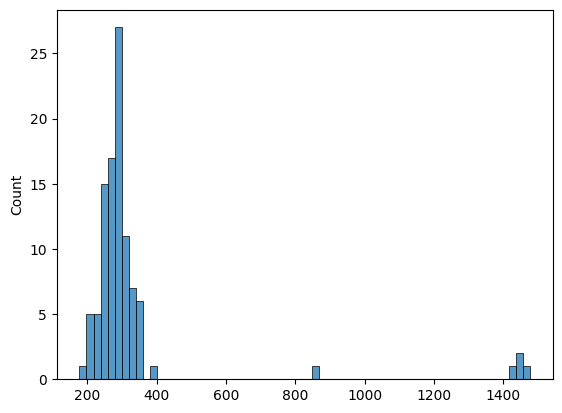

In [10]:
sns.histplot(sal_b)

# 미션 3

In [11]:
# 두 반의 수학 성적 데이터
np.random.seed(456)

# 1반: 평균 75점, 표준편차 작음 (고른 성적)
class_1_scores = np.random.normal(75, 8, 30)

# 2반: 평균 75점, 표준편차 큼 (성적 편차 심함)
class_2_scores = np.random.normal(75, 20, 30)

scores_data = pd.DataFrame({
    'class': ['1반']*30 + ['2반']*30,
    'score': np.concatenate([class_1_scores, class_2_scores])
})
print("📚 두 반의 수학 성적 데이터")
print(scores_data.head())

📚 두 반의 수학 성적 데이터
  class      score
0    1반  69.654972
1    1반  71.014324
2    1반  79.948607
3    1반  79.549538
4    1반  85.804076


In [12]:
# 각 반의 평균, 분산, 표준편차를 계산하세요.
scores_data.groupby('class')['score'].agg(['mean', 'var', 'std'])

,mean,var,std
class,,,
1반,76.580738,58.361584,7.639475
2반,73.800414,317.286249,17.812531


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


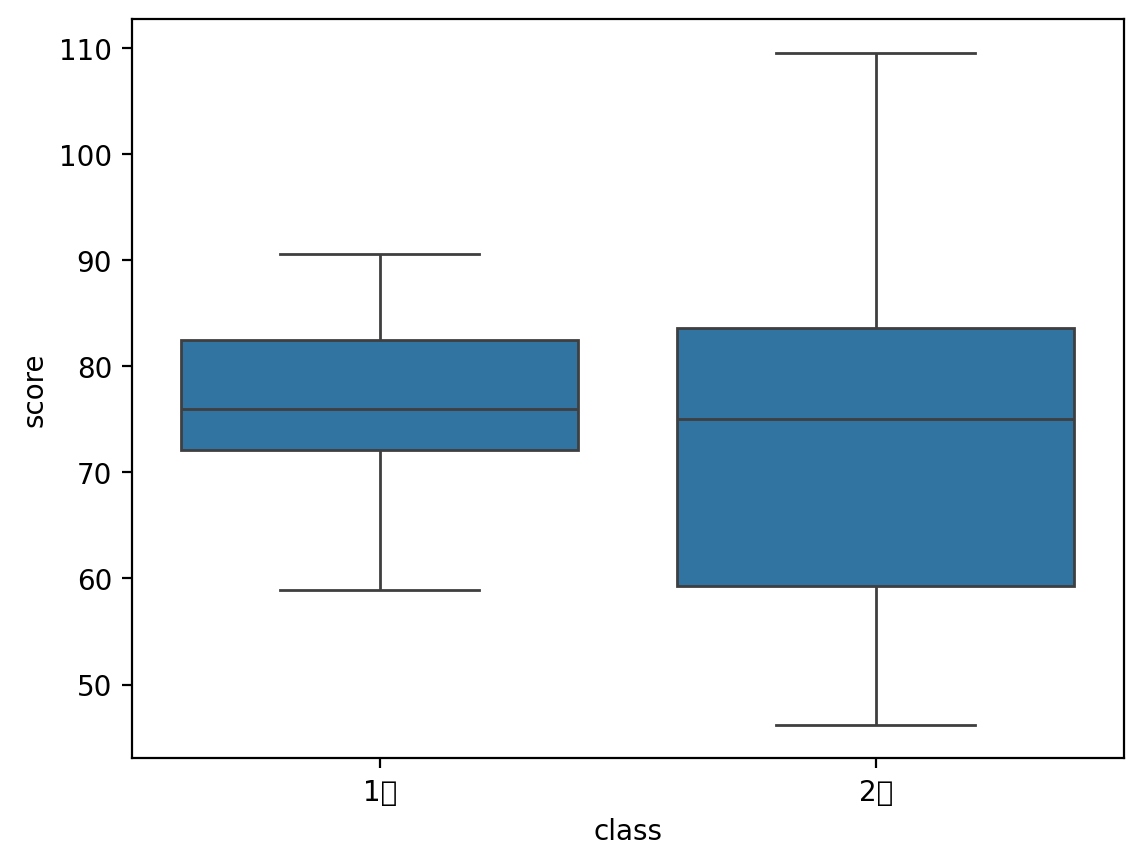

In [13]:
# 그래프 내 한글 폰트 설정
%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False

sns.boxplot(x='class',y='score',data=scores_data)
plt.show()

# 미션 3

In [14]:
# 카페 고객 데이터 생성
np.random.seed(789)

n_customers = 200
coffee_types = ['아메리카노', '라떼', '카푸치노', '에스프레소']
sizes = ['Small', 'Medium', 'Large']

cafe_data = pd.DataFrame({
    'customer_id': range(1, n_customers+1),
    'age': np.random.randint(18, 65, n_customers),
    'coffee_type': np.random.choice(coffee_types, n_customers),
    'price': np.random.normal(4500, 1000, n_customers),
    'satisfaction': np.random.randint(1, 6, n_customers)
})

print("☕ 카페 고객 데이터")
print(cafe_data.head())
print("\n데이터 타입:")
print(cafe_data.dtypes)

☕ 카페 고객 데이터
   customer_id  age coffee_type        price  satisfaction
0            1   32       에스프레소  3947.507923             4
1            2   48          라떼  6231.552374             4
2            3   36          라떼  4509.068710             5
3            4   19        카푸치노  4536.520788             3
4            5   30       아메리카노  4221.590181             5

데이터 타입:
customer_id       int64
age               int64
coffee_type      object
price           float64
satisfaction      int64
dtype: object


customer_id : 양적 변수 (이산형)

age : 양적 변수 (이산형)

coffee_type : 질적 변수 (범주형)

size : 질적 변수 (순서형)

price : 양적 변수 (연속형)

satisfaction : 질적 변수 (순서형)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/loca

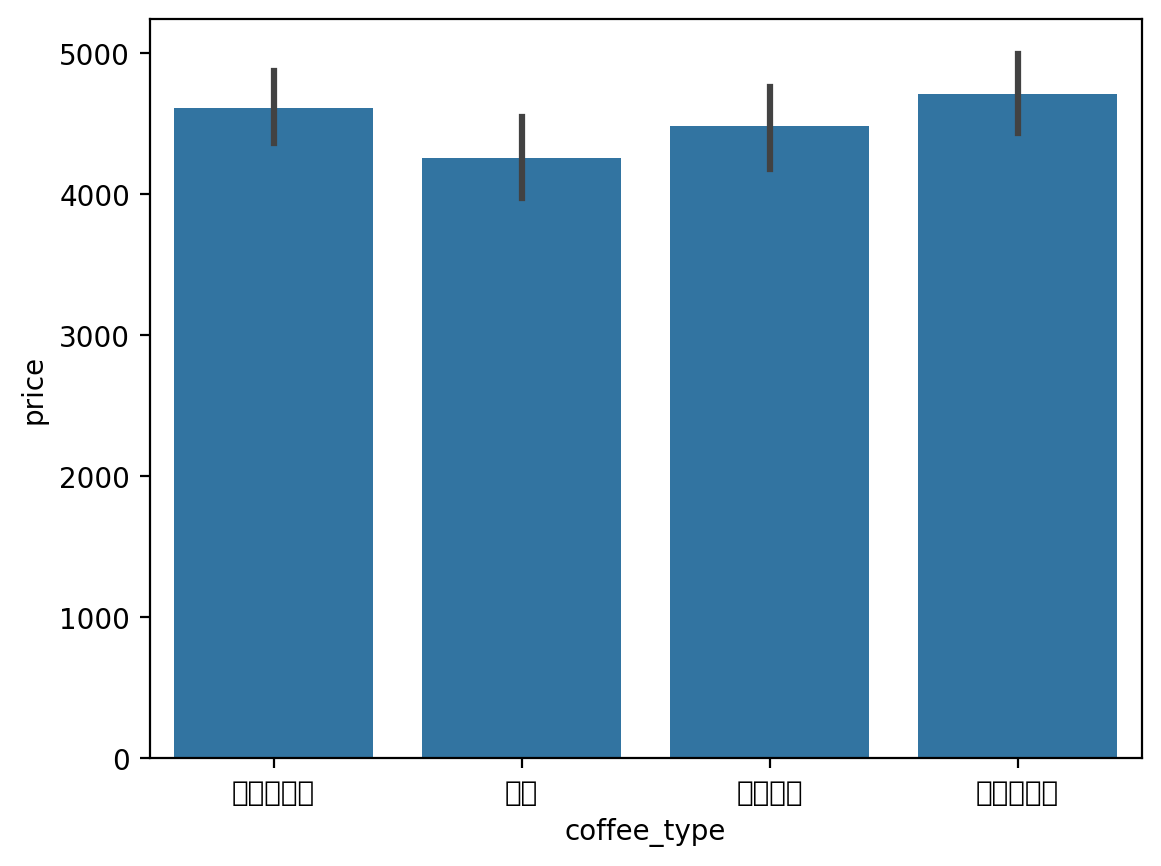

ValueError: Could not interpret value `size` for `x`. An entry with this name does not appear in `data`.

In [16]:
# 질적 변수는 막대그래프, 양적 변수는 히스토그램으로 시각화하세요
sns.barplot(x='coffee_type', y='price', data=cafe_data)
plt.show()

sns.barplot(x='size', y='price', data=cafe_data)
plt.show()

sns.barplot(x='satisfaction', y='price', data=cafe_data)
plt.show()

sns.histplot(x='price', data=cafe_data)
plt.show()

sns.boxplot(x='size', y='price', data=cafe_data)
plt.show()

sns.boxplot(x='satisfaction', y='price', data=cafe_data)
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/loca

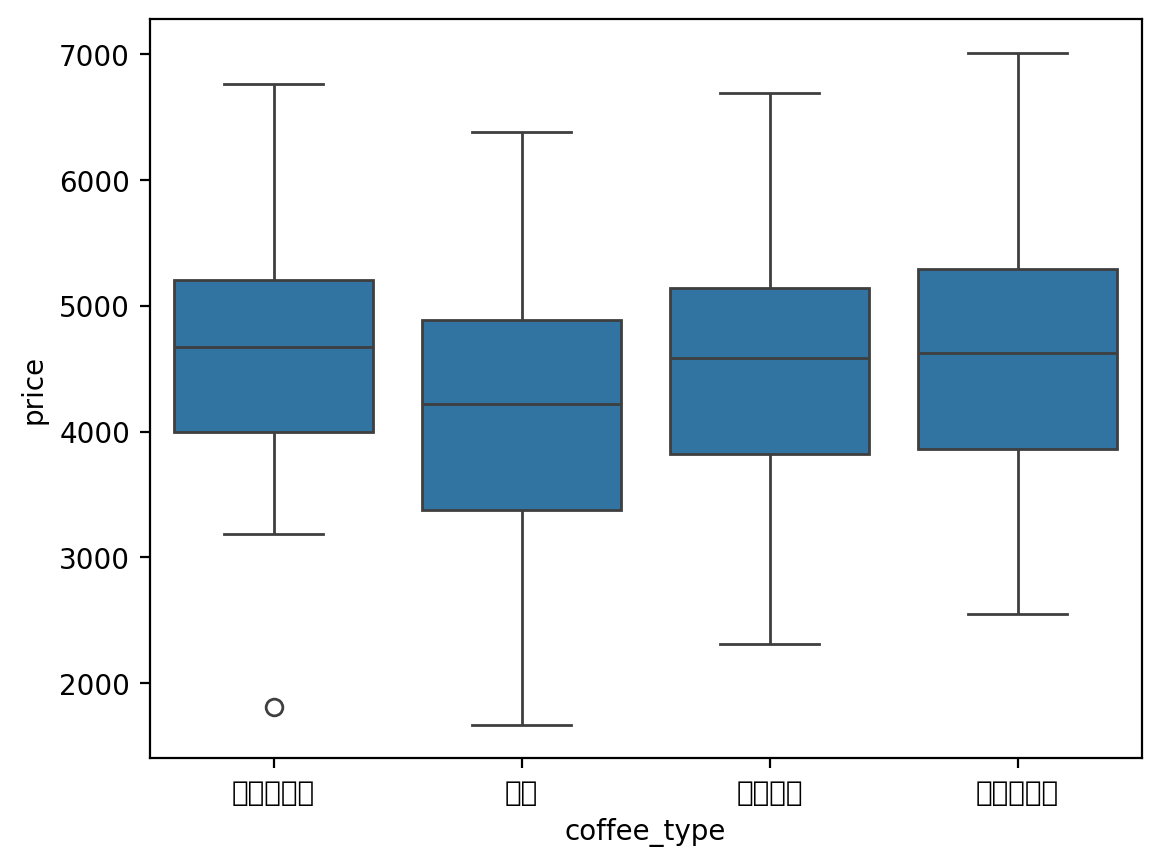

In [17]:
sns.boxplot(x='coffee_type', y='price', data=cafe_data)
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/loca

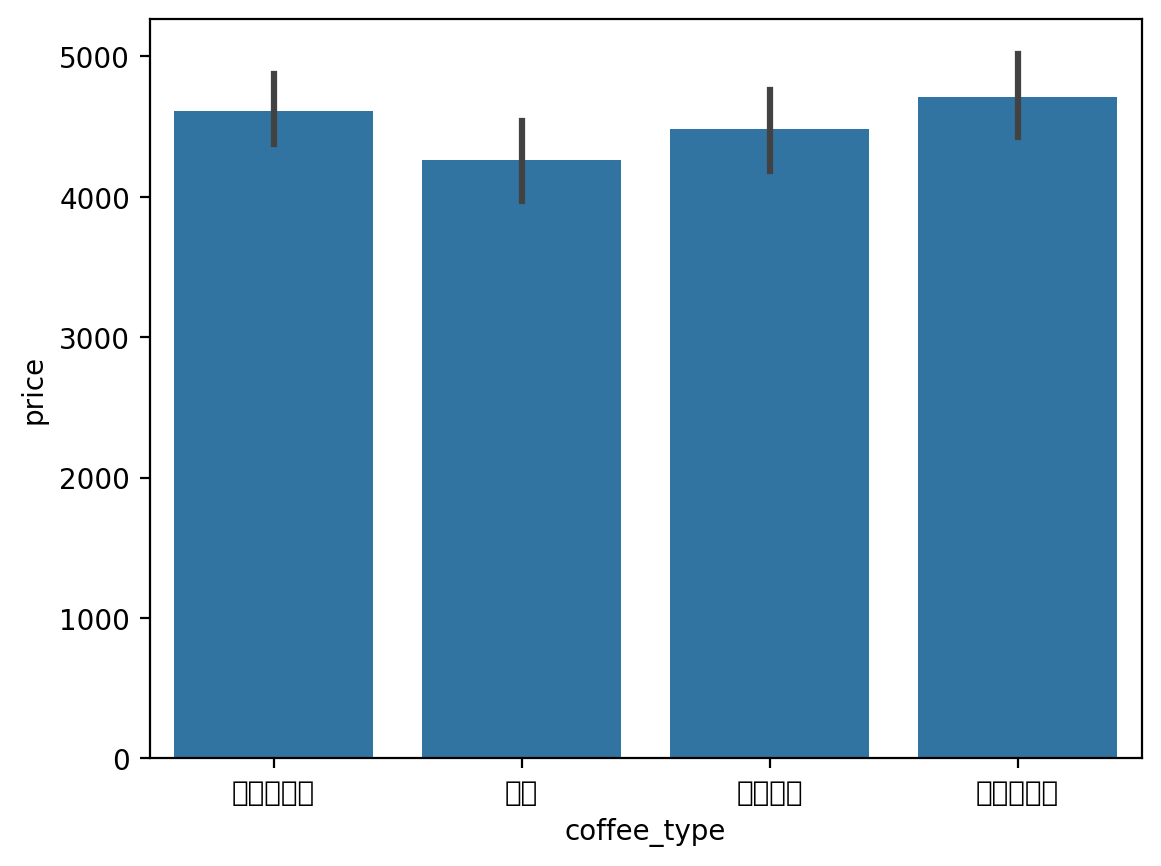

In [19]:
# 커피 타입별 평균 가격을 계산하고 막대그래프로 표시하세요

sns.barplot(x='coffee_type', y='price', data=cafe_data)
plt.show()

# 미션5

In [21]:
# 아이스크림 판매 데이터 생성
np.random.seed(101)

n_days = 100
temperature = np.random.normal(25, 8, n_days)  # 기온
humidity = np.random.normal(60, 15, n_days)    # 습도

# 아이스크림 판매량 = 기온에 비례 + 습도에 반비례 + 노이즈
ice_cream_sales = (temperature * 10 - humidity * 2 +
                   np.random.normal(0, 30, n_days) + 200)
ice_cream_sales = np.clip(ice_cream_sales, 0, None)  # 음수 제거

weather_data = pd.DataFrame({
    'day': range(1, n_days+1),
    'temperature': temperature,
    'humidity': humidity,
    'ice_cream_sales': ice_cream_sales
})
print("🍦 아이스크림 판매 데이터")
print(weather_data.head())

🍦 아이스크림 판매 데이터
   day  temperature   humidity  ice_cream_sales
0    1    46.654799  84.101698       489.959285
1    2    30.025062  43.264350       445.603228
2    3    32.263756  39.219322       496.759345
3    4    29.030606  40.055099       431.062264
4    5    30.208944  60.621899       385.455463


<Axes: >

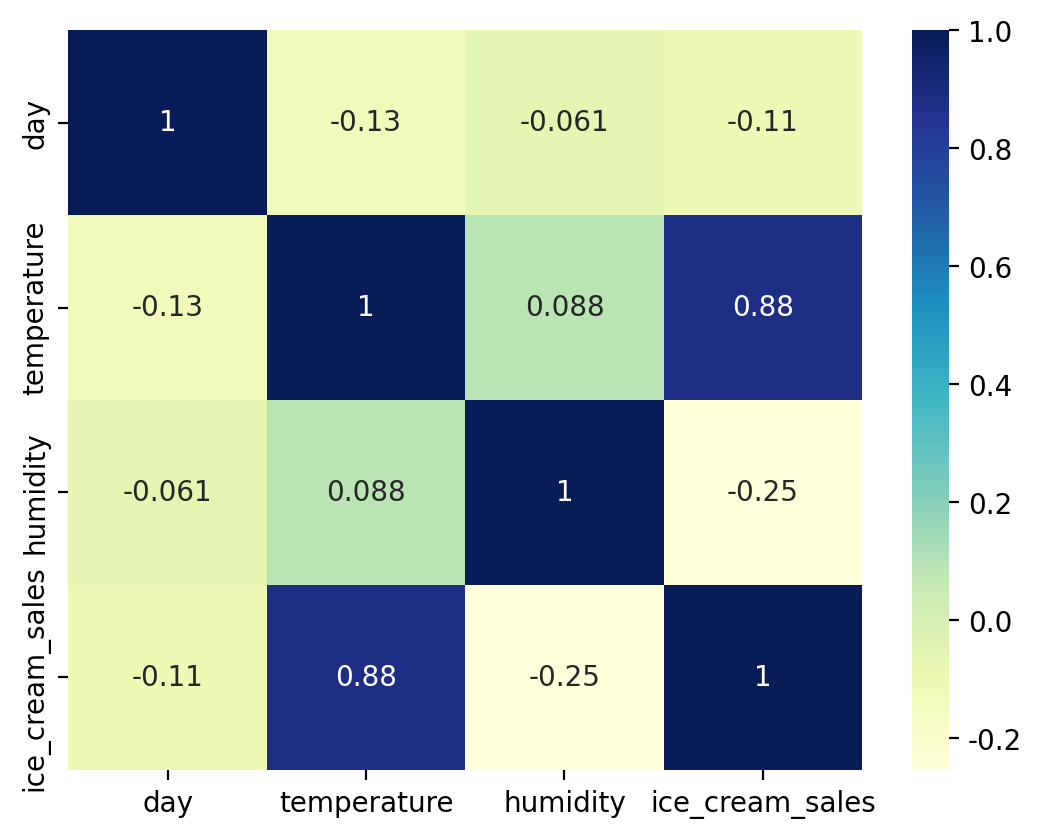

In [23]:
# weather_data의 상관계수 히트맵을 그려주세요.
sns.heatmap(weather_data.corr(), annot=True, cmap='YlGnBu')

In [24]:
# 기온과 아이스크림 판매량 간의 상관계수를 계산하세요
weather_data.corr()['temperature']['ice_cream_sales']

np.float64(0.8786074601247178)

<Axes: xlabel='temperature', ylabel='ice_cream_sales'>

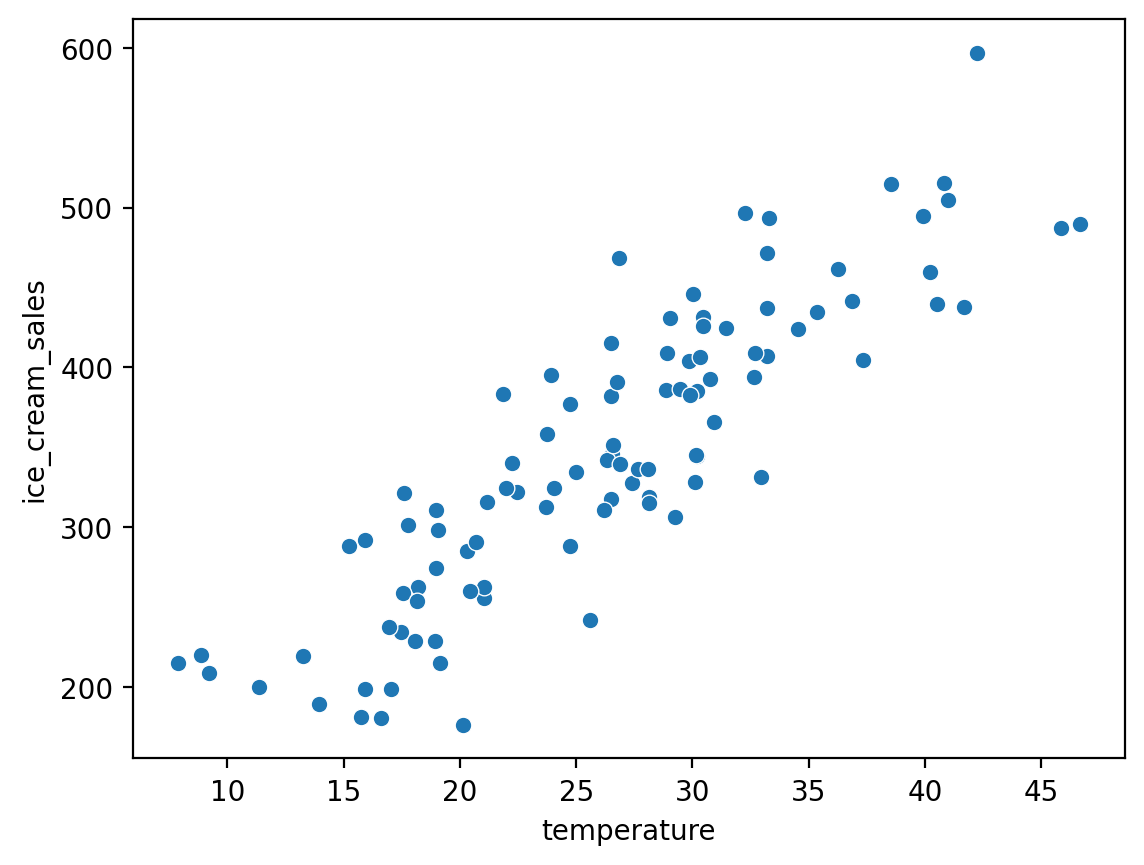

In [25]:
# 산점도를 그려서 두 변수(기온, 판매량)의 관계를 시각화하세요
sns.scatterplot(x='temperature', y='ice_cream_sales', data=weather_data)

<Axes: xlabel='humidity', ylabel='ice_cream_sales'>

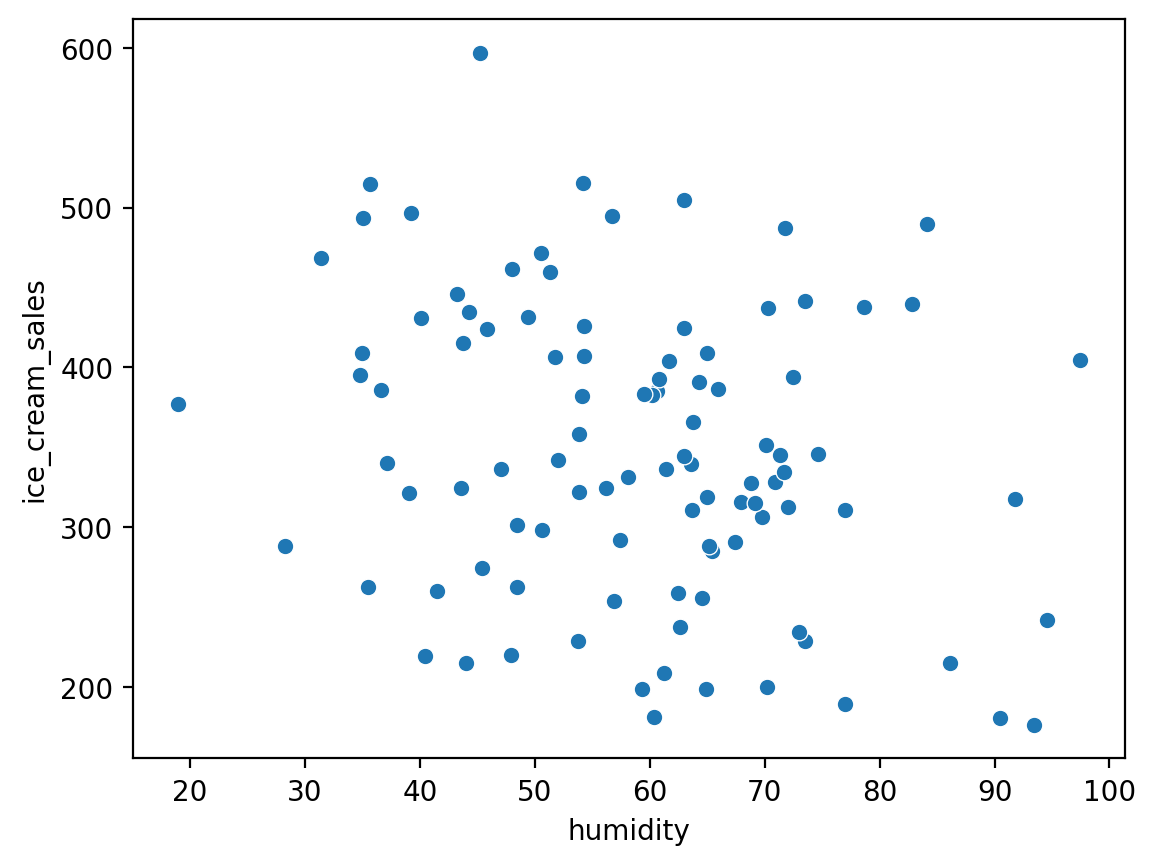

In [26]:
# 습도와 아이스크림 판매량의 관계도 분석하세요
sns.scatterplot(x='humidity', y='ice_cream_sales', data=weather_data)

# 미션 6

In [27]:
# 성인 남성 키 데이터 (정규분포)
np.random.seed(202)

heights = np.random.normal(172, 6, 1000)  # 평균 172cm, 표준편차 6cm

height_data = pd.DataFrame({
    'person_id': range(1, 1001),
    'height': heights
})

print("📏 성인 남성 키 데이터")
print(height_data.describe())

📏 성인 남성 키 데이터
         person_id       height
count  1000.000000  1000.000000
mean    500.500000   171.758897
std     288.819436     5.885099
min       1.000000   155.205447
25%     250.750000   167.823862
50%     500.500000   171.630446
75%     750.250000   175.922833
max    1000.000000   192.552602


<Axes: xlabel='height', ylabel='Count'>

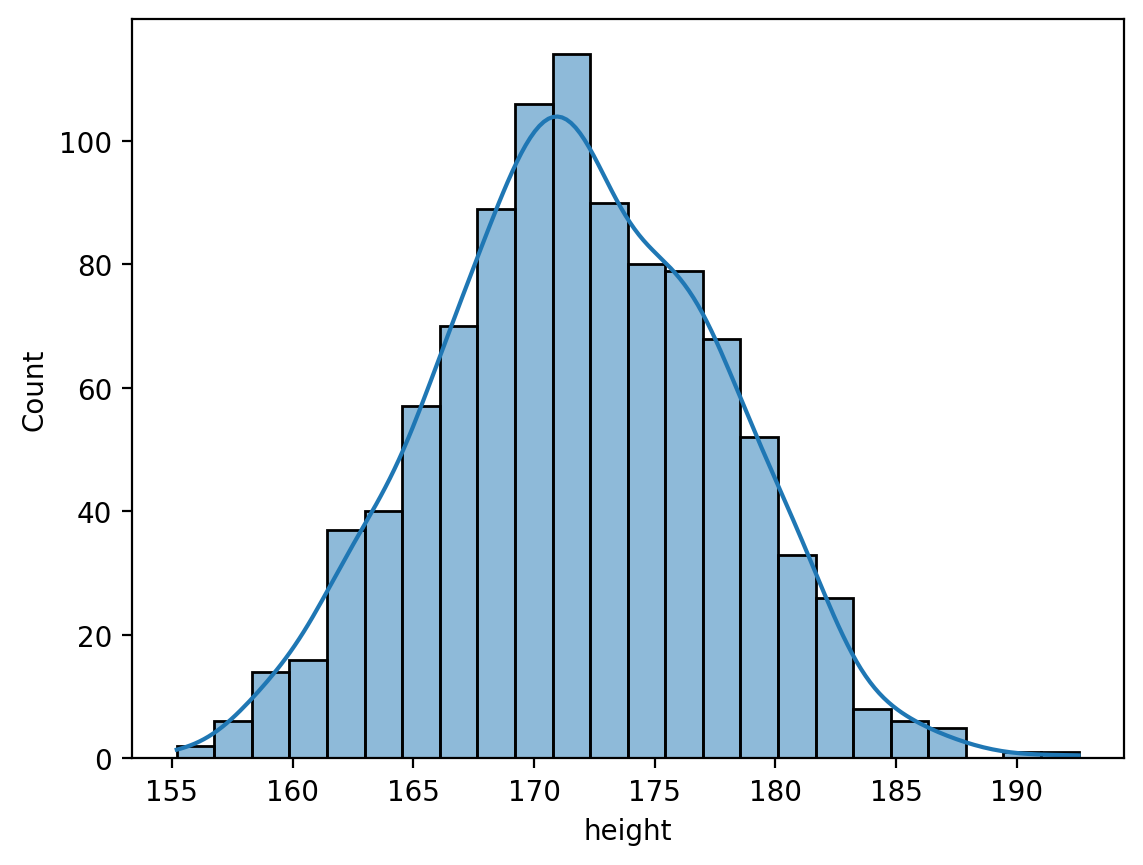

In [29]:
# 키 데이터의 히스토그램을 그리고 정규분포 곡선을 함께 표시하세요
# kde=True → 히스토그램 위에 확률 밀도 추정 곡선(KDE) 도 함께 그림
sns.histplot(height_data['height'], kde=True)

In [30]:
# 68-95-99.7 규칙을 확인해보세요 (평균 ± 1σ, 2σ, 3σ 범위의 데이터 비율을 출력해보세요.)

# 평균과 표준편차 계산
mean = height_data['height'].mean()
std = height_data['height'].std()

# 1σ, 2σ, 3σ 범위 계산
one_sigma = mean + std
two_sigma = mean + 2 * std
three_sigma = mean + 3 * std

# 데이터 비율 계산
print(f"1σ 범위 데이터 비율: {np.mean(height_data['height'] <= one_sigma) * 100:.2f}%")
print(f"2σ 범위 데이터 비율: {np.mean(height_data['height'] <= two_sigma) * 100:.2f}%")
print(f"3σ 범위 데이터 비율: {np.mean(height_data['height'] <= three_sigma) * 100:.2f}%")

1σ 범위 데이터 비율: 83.40%
2σ 범위 데이터 비율: 98.10%
3σ 범위 데이터 비율: 99.80%


In [32]:
# 180cm 이상인 사람의 비율을 계산하세요.
print(mean, std)

171.75889668812877 5.885099495626597


In [34]:
# 180에서 평균을 뺀 값을 표준편차로 나눈 나머지
(180 - mean) % std

np.float64(2.3560038162446313)

In [36]:
# 키가 180cm 이상인 사람들의 비율(%)을 계산, 둘째자리 반올림
print(f"{np.mean(height_data['height'] >= 180) * 100:.2f}%")

8.40%


In [38]:
# 키가 160cm~180cm 사이인 사람의 비율을 구하세요
bottom = np.mean(height_data['height']<=160)*100
top = np.mean(height_data["height"] >= 180) * 100
print(f'{bottom:.2f}%')
print(f'{top:.2f}%')

2.20%
8.40%


In [39]:
print(f'{bottom+top:.2f}%')

10.60%


# 미션 7

In [40]:
# 전국 대학생 용돈 모집단 데이터 (가상)
np.random.seed(303)

# 모집단: 전국 대학생 100,000명
population_size = 100000
population_allowance = np.random.gamma(2, 15, population_size)

print("💰 전국 대학생 용돈 모집단 정보")
print(f"모집단 크기: {population_size:,}명")
print(f"모집단 평균: {population_allowance.mean():.2f}만원")
print(f"모집단 표준편차: {population_allowance.std():.2f}만원")

💰 전국 대학생 용돈 모집단 정보
모집단 크기: 100,000명
모집단 평균: 29.96만원
모집단 표준편차: 21.11만원


In [41]:
# 크기가 다른 표본들(n=10, 50, 100, 500)을 각각 추출하세요
# replace=False 비복원 추출, 뽑은 값을 다시 모집단에 넣지 않음
np.random.seed(404)

sample_10 = np.random.choice(population_allowance, size=10, replace=False)
sample_50 = np.random.choice(population_allowance, size=50, replace=False)
sample_100 = np.random.choice(population_allowance, size=100, replace=False)
sample_500 = np.random.choice(population_allowance, size=500, replace=False)

print(sample_10)
print(sample_50)
print(sample_100)
print(sample_500)

[37.41867995 84.85743333 30.59094834 54.43639383 91.00517605  8.73114554
 27.39843516 46.28321574 11.52025092 26.6616241 ]
[ 22.77210707   6.79194272  95.00967987  25.5953307   24.48298586
  40.05547645   3.61703248   9.7563821   18.21949653   8.57116987
  17.55879052   6.5182291   28.89814281  26.58347798  19.06978233
  59.71841614  18.68342512  17.96139161  12.25336127  28.44933601
  24.55198303  44.29364345  21.00885936  99.41566093  23.81043766
  15.46020655   4.65531445  11.51462164  36.19727447  24.04995873
   9.96001272  21.52665554  17.68084414  31.43725642  26.26380931
  13.93266925  45.24800638  13.72548802  23.53963181  58.88266751
  46.49000758  38.63363074  15.44471126   9.66899806  18.97375782
  17.13483835  55.70210033  58.70625006 110.68470225  47.75158265]
[16.79503051 34.11163844 23.1369227  24.32880082 65.5049906  42.30456949
 13.49514595  9.07264986 25.8938986  42.58591378 11.46339185 17.75815431
 15.34146321 19.83354665 19.29915973 40.10423297 22.09445863 25.267682

In [42]:
# 각 표본의 평균과 표준편차를 계산하고 모집단 값과 비교하세요.

print('10개의 평균: ', sample_10.mean(), '표준편차: ', sample_10.std())
print('50개의 평균: ', sample_50.mean(), '표준편차: ', sample_50.std())
print('100개의 평균: ', sample_100.mean(), '표준편차: ', sample_100.std())
print('500개의 평균: ', sample_500.mean(), '표준편차: ', sample_500.std())

10개의 평균:  41.89033029702125 표준편차:  26.545460311235043
50개의 평균:  29.53823074022167 표준편차:  23.347568656491575
100개의 평균:  26.811676917299188 표준편차:  18.185861432151768
500개의 평균:  29.527541009457746 표준편차:  22.193666519138205


In [43]:
# 각 표본의 평균과 표준편차를 계산하고 모집단 값과 비교하세요

print('모집단 평균: ', population_allowance.mean())
print('모집단 표준편차: ', population_allowance.std())

print('10개 샘플과 모집단의 평균 차이: ', sample_10.mean() - population_allowance.mean(), '표준편차 차이:', sample_10.std() - population_allowance.std())
print('50개 샘플과 모집단의 평균 차이: ', sample_50.mean() - population_allowance.mean(), '표준편차 차이:', sample_50.std() - population_allowance.std())
print('100개 샘플과 모집단의 평균 차이: ', sample_100.mean() - population_allowance.mean(), '표준편차 차이:', sample_100.std() - population_allowance.std())
print('500개 샘플과 모집단의 평균 차이: ', sample_500.mean() - population_allowance.mean(), '표준편차 차이:', sample_500.std() - population_allowance.std())

모집단 평균:  29.962436807631846
모집단 표준편차:  21.109763264019374
10개 샘플과 모집단의 평균 차이:  11.927893489389405 표준편차 차이: 5.435697047215669
50개 샘플과 모집단의 평균 차이:  -0.4242060674101751 표준편차 차이: 2.2378053924722003
100개 샘플과 모집단의 평균 차이:  -3.150759890332658 표준편차 차이: -2.9239018318676067
500개 샘플과 모집단의 평균 차이:  -0.4348957981741002 표준편차 차이: 1.0839032551188303


In [44]:
# 표본 크기가 커질수록 모집단 평균에 얼마나 가까워지는지 확인하세요

diff_mean = population_allowance.mean() - sample_500.mean()
diff_std = population_allowance.std() - sample_500.std()

print(f'{diff_mean/population_allowance.mean():.3f}%')
print(f'{diff_std/population_allowance.std():.3f}%')

0.015%
-0.051%


# 미션 8

In [45]:
# 회사원 연봉 데이터 (이상값 포함)
np.random.seed(404)

# 일반 직원 연봉 (정규분포)
normal_salaries = np.random.normal(4000, 800, 95)

# 임원 연봉 (이상값)
executive_salaries = np.random.normal(15000, 2000, 5)

all_salaries = np.concatenate([normal_salaries, executive_salaries])

salary_data = pd.DataFrame({
    'employee_id': range(1, 101),
    'annual_salary': all_salaries
})

print("💼 회사원 연봉 데이터")
print(salary_data.describe())

💼 회사원 연봉 데이터
       employee_id  annual_salary
count   100.000000     100.000000
mean     50.500000    4614.056781
std      29.011492    2358.026794
min       1.000000    2043.022815
25%      25.750000    3618.348192
50%      50.500000    4075.983326
75%      75.250000    4733.313483
max     100.000000   16678.798919


<Axes: xlabel='annual_salary'>

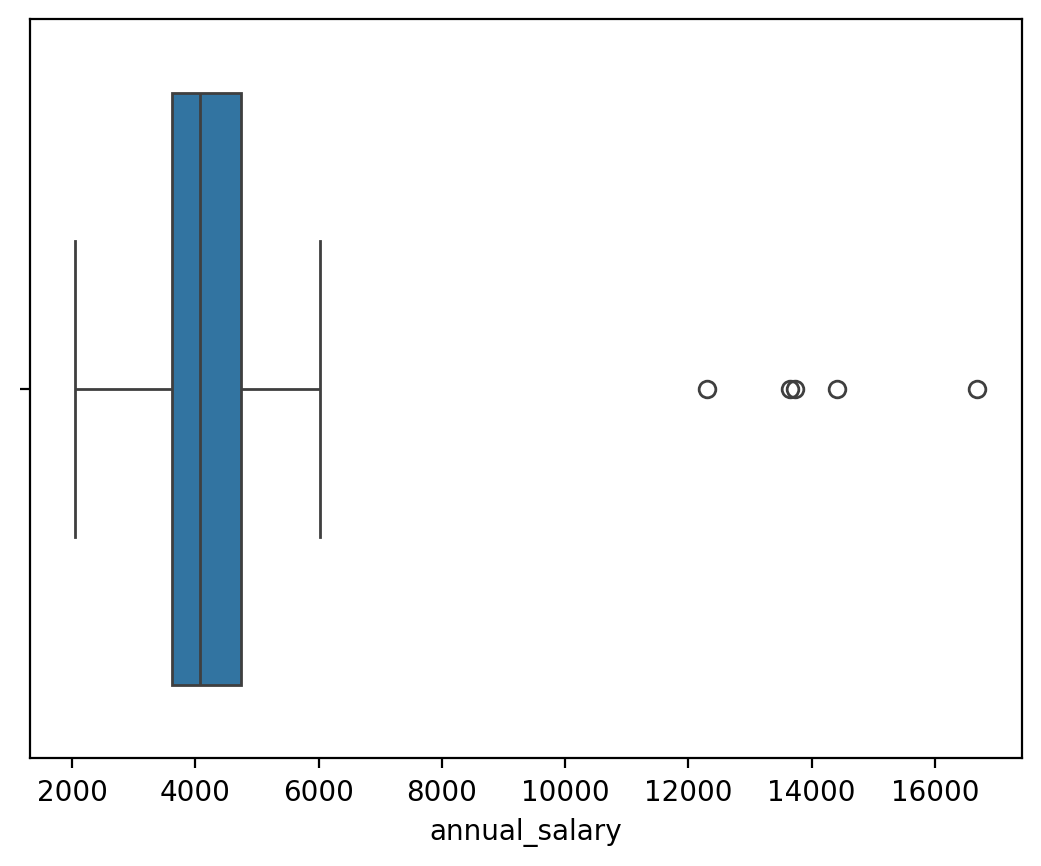

In [46]:
# 상자그림을 그려서 이상값을 시각적으로 확인하세요

sns.boxplot(x='annual_salary', data=salary_data)

In [47]:
salary_data[salary_data['annual_salary'] > 10000]

,employee_id,annual_salary
95,96,16678.798919
96,97,14407.696906
97,98,12298.717334
98,99,13652.838809
99,100,13736.799967


In [48]:
# IQR(사분위수 범위) 방법으로 이상값을 수치적으로 찾아보세요

salary_data['annual_salary'].quantile(0.25)
salary_data['annual_salary'].quantile(0.75)

# IQR은 중간 50%의 범위
iqr = salary_data['annual_salary'].quantile(0.75) - salary_data['annual_salary'].quantile(0.25)

# 이상치 기준 경계 설정
lower_bound = salary_data['annual_salary'].quantile(0.25) - 1.5 * iqr
upper_bound = salary_data['annual_salary'].quantile(0.75) + 1.5 * iqr

# 이상치 필터링
salary_data[(salary_data['annual_salary'] < lower_bound) | (salary_data['annual_salary'] > upper_bound)]

,employee_id,annual_salary
95,96,16678.798919
96,97,14407.696906
97,98,12298.717334
98,99,13652.838809
99,100,13736.799967


In [49]:
# 이상값을 제거하기 전후의 평균과 중앙값을 비교하세요

mean_before = salary_data['annual_salary'].mean()
median_before = salary_data['annual_salary'].median()

salary_data_no_outlier = salary_data[salary_data['annual_salary'] < 15000]

mean_after = salary_data_no_outlier['annual_salary'].mean()
median_after = salary_data_no_outlier['annual_salary'].median()

print(f'이상값 제거 전 평균: {mean_before:.2f}, 중앙값: {median_before:.2f}')
print(f'이상값 제거 후 평균: {mean_after:.2f}, 중앙값: {median_after:.2f}')

이상값 제거 전 평균: 4614.06, 중앙값: 4075.98
이상값 제거 후 평균: 4492.19, 중앙값: 4042.57


# 미션 9

In [50]:
# 세 매장의 일일 매출 데이터
np.random.seed(505)

# 매장별 특성이 다른 매출 분포
store_a_sales = np.random.normal(800, 100, 90)   # 안정적
store_b_sales = np.random.exponential(600, 90)   # 치우친 분포
store_c_sales = np.random.uniform(400, 1200, 90) # 균등분포

sales_data = pd.DataFrame({
    'store': ['A']*90 + ['B']*90 + ['C']*90,
    'daily_sales': np.concatenate([store_a_sales, store_b_sales, store_c_sales])
})

print("🏪 세 매장의 일일 매출 데이터")
print(sales_data.groupby('store')['daily_sales'].describe())

🏪 세 매장의 일일 매출 데이터
       count        mean         std         min         25%         50%  \
store                                                                      
A       90.0  794.927382   95.573605  574.697691  734.660135  790.687193   
B       90.0  727.292560  694.047674   15.861679  219.729330  501.261904   
C       90.0  848.842069  228.457501  403.269401  642.649898  855.099528   

               75%          max  
store                            
A       856.350767  1033.281073  
B      1037.378317  3783.321720  
C      1065.125671  1193.574079  


In [51]:
# 각 매장의 평균, 중앙값, 표준편차를 계산하세요

sales_data.groupby('store')['daily_sales'].describe()[['mean', '50%', 'std']]

,mean,50%,std
store,,,
A,794.927382,790.687193,95.573605
B,727.292560,501.261904,694.047674
C,848.842069,855.099528,228.457501


<Axes: xlabel='daily_sales', ylabel='Count'>

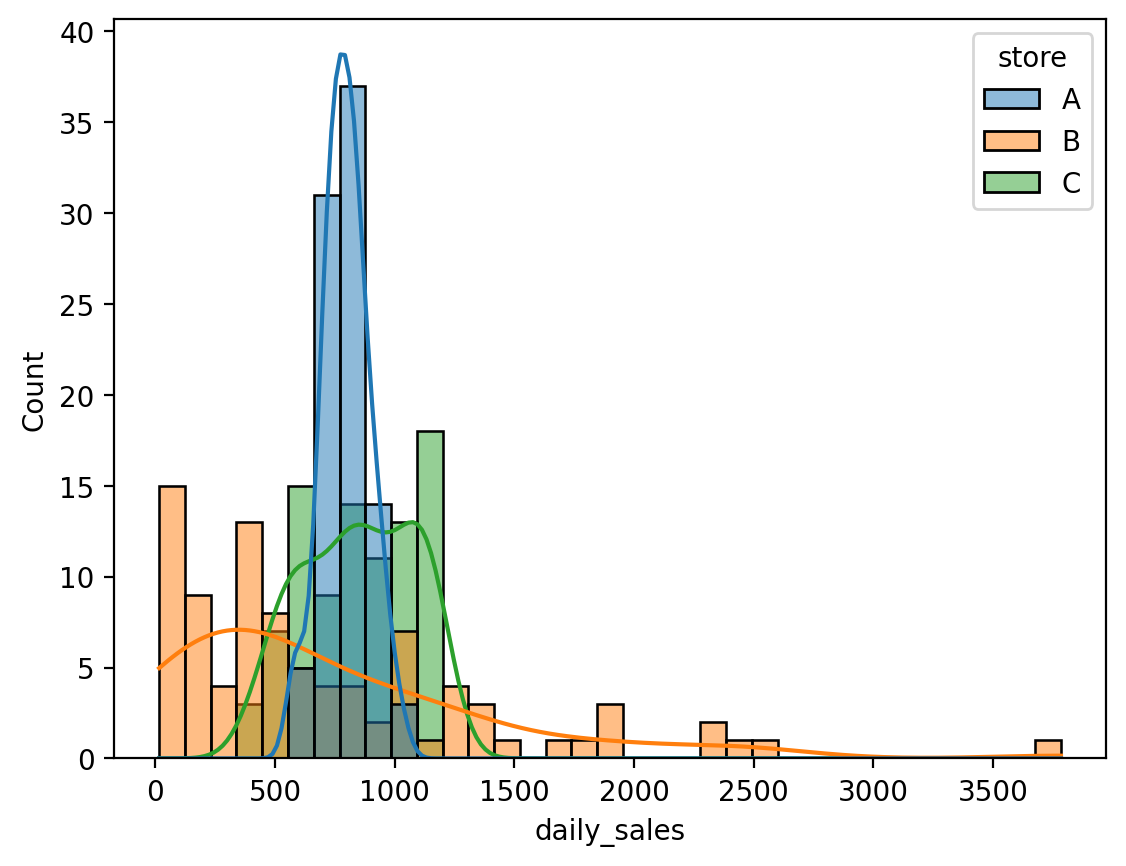

In [52]:
# 세 매장의 매출 분포를 비교하는 히스토그램을 그리세요

sns.histplot(x = 'daily_sales', hue='store', kde=True, data=sales_data)

<Axes: xlabel='store', ylabel='daily_sales'>

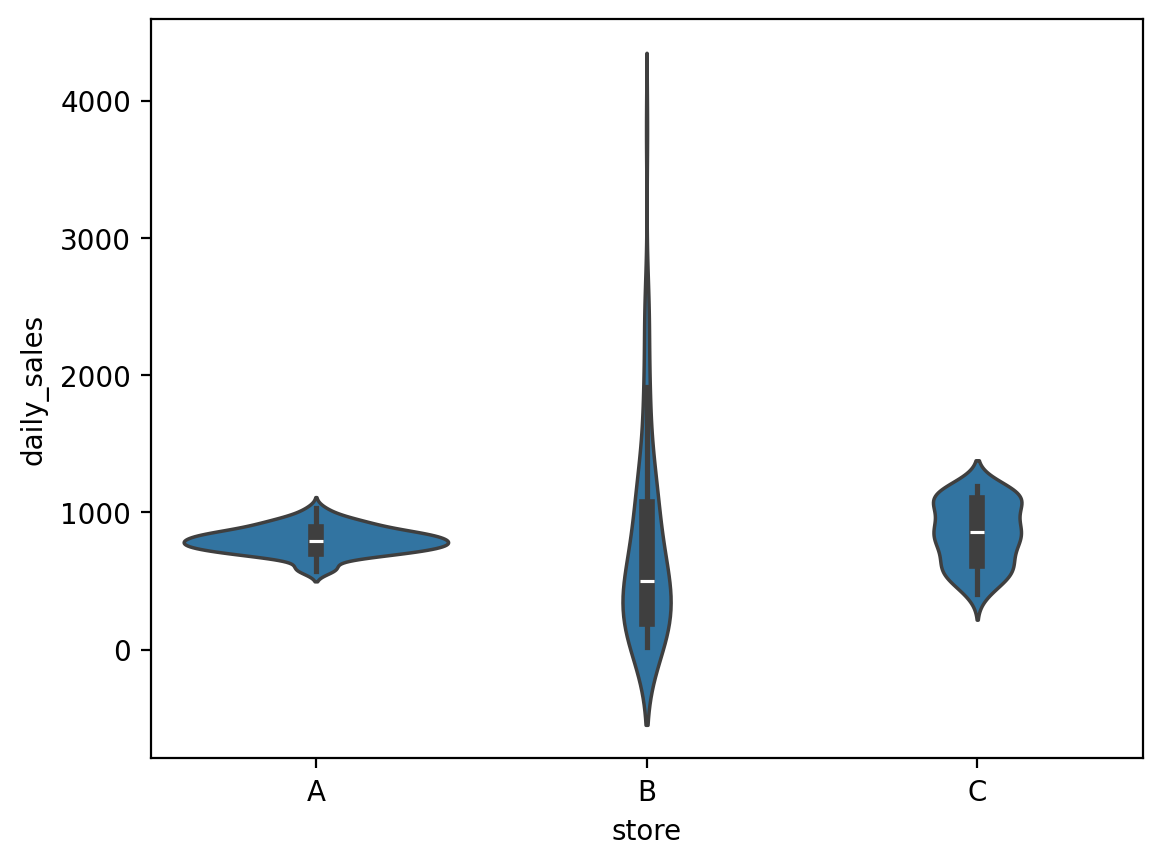

In [53]:
# 바이올린 플롯을 사용해서 분포 모양을 비교하세요

sns.violinplot(x='store', y='daily_sales', data=sales_data)